In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

# 한글 폰트 설정 (Windows)
plt.rcParams['font.family'] = 'Malgun Gothic'

# 마이너스 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False


### kospi EDA


📌 DF1 HEAD


,날짜,종가,시가,고가,저가,거래량,변동 %
0,2026- 02- 01,"5,364.04","5,122.62","5,376.92","4,899.30",5.58B,2.67%
1,2026- 01- 01,"5,224.36","4,224.53","5,321.68","4,216.68",11.55B,23.97%
2,2025- 12- 01,"4,214.17","3,967.92","4,226.36","3,892.08",8.41B,7.32%
3,2025- 11- 01,"3,926.59","4,123.36","4,226.75","3,833.35",7.30B,-4.40%
4,2025- 10- 01,"4,107.50","3,444.06","4,146.72","3,440.42",8.66B,19.94%



📌 DF1 DTYPES (Before)


,dtype
날짜,object
종가,object
시가,object
고가,object
저가,object
거래량,object
변동 %,object



📌 DF1 날짜 변환 후 DTYPES


,dtype
날짜,datetime64[ns]
종가,object
시가,object
고가,object
저가,object
거래량,object
변동 %,object



📌 DF1 자동 수치 변환 컬럼
['종가', '시가', '고가', '저가', '거래량', '변동 %']

📌 DF1 DTYPES (After)


,dtype
날짜,datetime64[ns]
종가,float64
시가,float64
고가,float64
저가,float64
거래량,float64
변동 %,float64



📌 DF1 SHAPE
(194, 7)

📌 DF1 MISSING VALUES


,missing_count
날짜,0
종가,0
시가,0
고가,0
저가,0
거래량,0
변동 %,0



📌 DF1 DUPLICATES
0

📌 DF1 DESCRIBE


,날짜,종가,시가,고가,저가,거래량,변동 %
count,194,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,2018-01-15 09:46:23.505154560,2313.139897,2296.145103,2382.651546,2215.271082,10.085773,0.726701
min,2010-01-01 00:00:00,1594.580000,1603.870000,1631.710000,1439.430000,4.290000,-13.370000
25%,2014-01-08 18:00:00,1985.657500,1988.570000,2024.410000,1928.255000,7.167500,-2.055000
50%,2018-01-16 12:00:00,2123.090000,2128.295000,2215.785000,2052.925000,8.735000,0.795000
75%,2022-01-24 06:00:00,2516.872500,2509.432500,2595.520000,2420.077500,10.922500,3.380000
max,2026-02-01 00:00:00,5364.040000,5122.620000,5376.920000,4899.300000,35.350000,23.970000
std,NaN,534.942976,488.487799,545.973762,477.883275,4.980138,5.107596



📌 DF1 BOXPLOT (Mean, Q1, Q3)

📊 종가
Mean: 2313.140
Q1  : 1985.657
Q3  : 2516.872


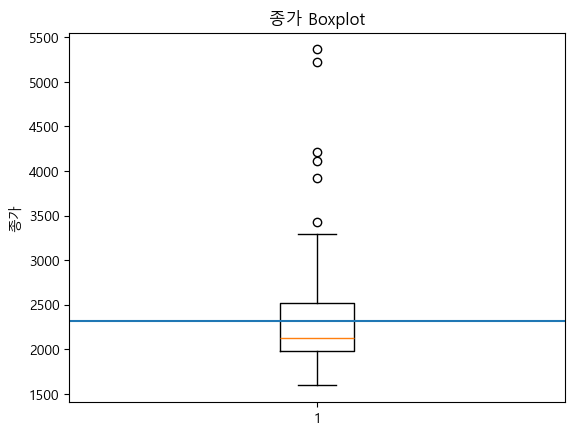


📊 시가
Mean: 2296.145
Q1  : 1988.570
Q3  : 2509.432


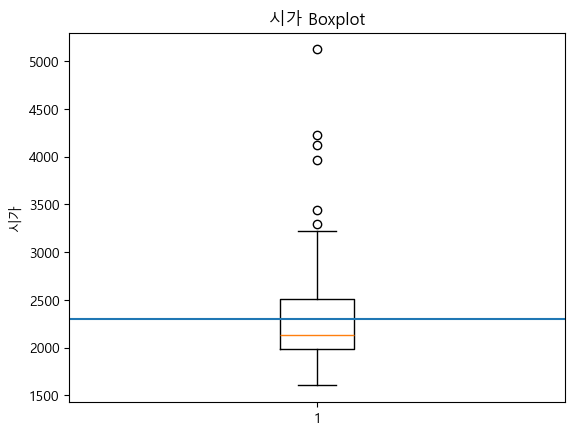


📊 고가
Mean: 2382.652
Q1  : 2024.410
Q3  : 2595.520


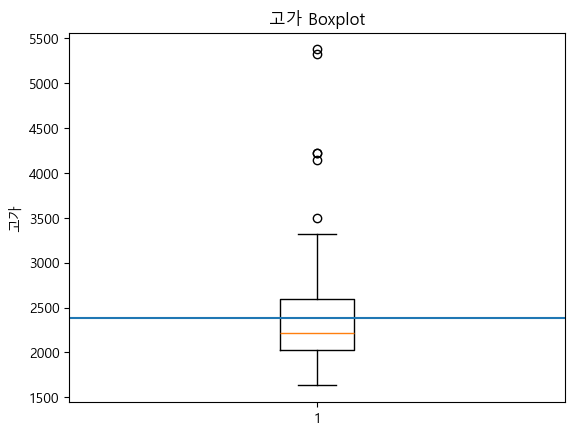


📊 저가
Mean: 2215.271
Q1  : 1928.255
Q3  : 2420.077


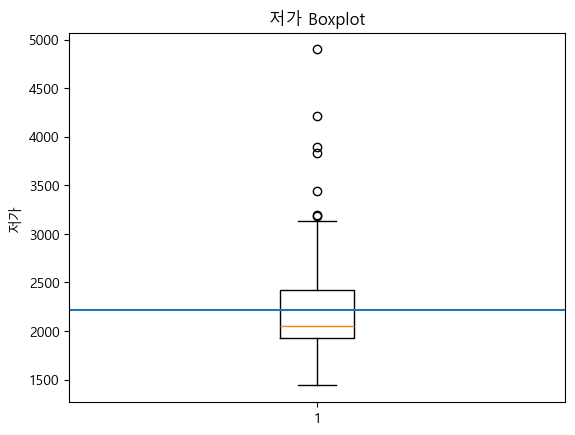


📊 거래량
Mean: 10.086
Q1  : 7.168
Q3  : 10.922


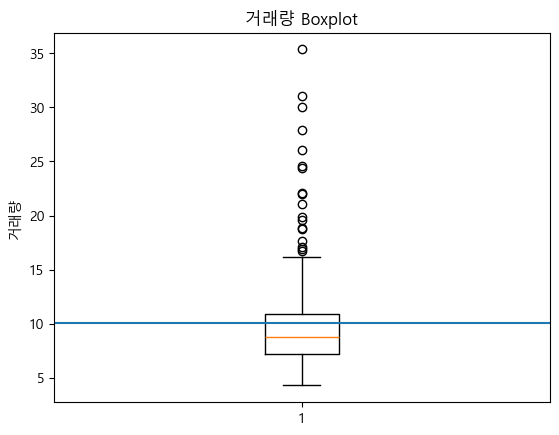


📊 변동 %
Mean: 0.727
Q1  : -2.055
Q3  : 3.380


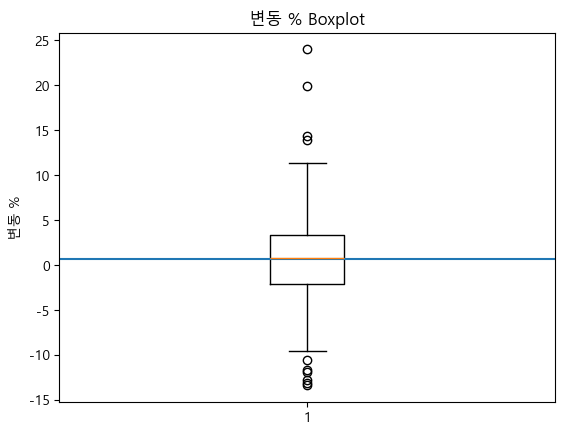

In [7]:
def section(title):
    print("\n" + "="*60)
    print(f"📌 {title}")
    print("="*60)

# =========================
# 1. 로딩
# =========================
df1 = pd.read_csv("data/kospi.csv")

section("DF1 HEAD")
display(df1.head())

section("DF1 DTYPES (Before)")
display(pd.DataFrame(df1.dtypes, columns=["dtype"]))


# =========================
# 2. 첫 번째 열 → datetime 변환
# =========================
date_col = df1.columns[0]

df1[date_col] = (
    df1[date_col]
    .astype(str)
    .str.replace(" ", "", regex=False)
)

df1[date_col] = pd.to_datetime(df1[date_col], errors="coerce")

section("DF1 날짜 변환 후 DTYPES")
display(pd.DataFrame(df1.dtypes, columns=["dtype"]))


# =========================
# 3. object → 수치형 자동 변환
# =========================
def to_numeric_smart(series):
    s = series.astype(str).str.strip()
    s = s.replace({"": np.nan, "-": np.nan, "nan": np.nan})

    s0 = s.str.replace(" ", "", regex=False).str.replace(",", "", regex=False)
    s0 = s0.str.replace("%", "", regex=False)
    s1 = s0.str.replace(r"[^0-9\.\-]", "", regex=True)

    return pd.to_numeric(s1, errors="coerce")

converted_cols = []

for col in df1.columns:
    if df1[col].dtype == "object":
        conv = to_numeric_smart(df1[col])
        valid_ratio = conv.notna().sum() / max(df1[col].notna().sum(), 1)

        if valid_ratio >= 0.8:
            df1[col] = conv
            converted_cols.append(col)

section("DF1 자동 수치 변환 컬럼")
print(converted_cols)

section("DF1 DTYPES (After)")
display(pd.DataFrame(df1.dtypes, columns=["dtype"]))


# =========================
# 4. 기본 EDA
# =========================
section("DF1 SHAPE")
print(df1.shape)

section("DF1 MISSING VALUES")
display(pd.DataFrame(df1.isnull().sum(), columns=["missing_count"]))

section("DF1 DUPLICATES")
print(df1.duplicated().sum())

section("DF1 DESCRIBE")
display(df1.describe())


# =========================
# 5. 박스플롯 + Mean / Q1 / Q3
# =========================
section("DF1 BOXPLOT (Mean, Q1, Q3)")

numeric_cols = df1.select_dtypes(include=np.number).columns

for col in numeric_cols:
    mean_val = df1[col].mean()
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)

    print(f"\n📊 {col}")
    print(f"Mean: {mean_val:.3f}")
    print(f"Q1  : {Q1:.3f}")
    print(f"Q3  : {Q3:.3f}")

    plt.figure()
    plt.boxplot(df1[col].dropna())
    plt.axhline(mean_val)  # 평균선
    plt.title(f"{col} Boxplot")
    plt.ylabel(col)
    plt.show()
